<a href="https://colab.research.google.com/github/bonillahermes/Data_Science_Projects/blob/main/RegLog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hermes Yate Bonilla
**Data Scientist**
---

**Contact:**
- **Email:** [bonillahermes@gmail.com](mailto:bonillahermes@gmail.com)
- **LinkedIn:** [linkedin.com/in/bonillahermes](https://www.linkedin.com/in/bonillahermes/)
- **GitHub:** [github.com/bonillahermes](https://github.com/bonillahermes)
- **Webpage:** [bonillahermes.com](https://bonillahermes.com/)
---

# Regresión Logística

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ruta del archivo de datos
file_path = "/content/drive/MyDrive/Bases/german numeric.xlsx"

# Lee el archivo
df = pd.read_excel(file_path, header = None)

In [ ]:
# Obtener variable objetivo
y = df.iloc[:, -1]

# Definir matriz de características X
X = df.iloc[:, :-1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crea el objeto del escalador
scaler = MinMaxScaler()

# Ajusta y transforma los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transforma los datos de prueba utilizando el mismo escalador
X_test_scaled = scaler.transform(X_test)

# Definir una lista de posibles valores de C para la búsqueda de hiperparámetros
param_grid = {
    'penalty': ['l2'],  # Usamos solo 'l2' para evitar el error con 'lbfgs'
    'solver': ['lbfgs', 'liblinear'],  # Incluimos ambos solvers para su evaluación
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'tol': [0.0001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 500, 1000, 5000, 10000, 50000, 100000],
    'dual': [False],
    'fit_intercept': [True, False],
    'multi_class': ['ovr', 'auto'],  # Excluimos 'multinomial' para evitar error con 'liblinear'
    'random_state': [42]
}

In [ ]:
# Crear el modelo
model = LogisticRegression()

# Búsqueda de hiperparámetros usando GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Obtener el mejor modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Imprimir los mejores hiperparámetros y su precisión correspondiente en el conjunto de validación
print("Mejores hiperparámetros:", best_params)
print("Precisión correspondiente:", best_score)

Mejores hiperparámetros: {'C': 10, 'dual': False, 'fit_intercept': False, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.1}
Precisión correspondiente: 0.765


In [ ]:
# Train the best model with all the training data
best_model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test_scaled)

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

# Calcular la precisión
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calcular la recuperación (recall)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calcular el área bajo la curva ROC
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC:", roc_auc)

Confusion Matrix:
[[139   5]
 [ 34  22]]
Precision: 0.8034682080924855
Recall: 0.9652777777777778
ROC AUC: 0.6790674603174603


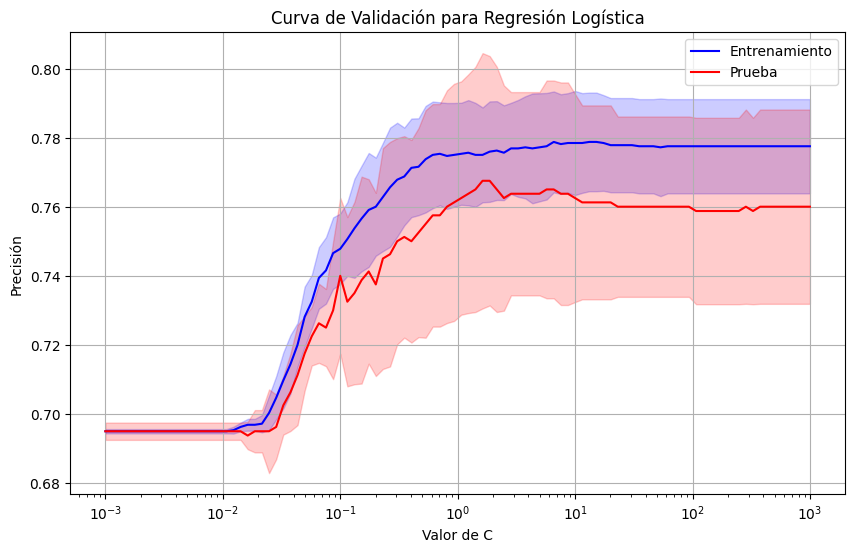

Precisión en Validación Cruzada: [0.72  0.715 0.76  0.735 0.74 ]
Precisión promedio en Validación Cruzada: 0.734


In [ ]:
# Definir los valores de C a probar para la curva de validación
param_range = np.logspace(-3, 3, 100)

# Calcular la curva de validación
train_scores, test_scores = validation_curve(
    LogisticRegression(max_iter=100000, solver='liblinear', random_state=42),
    X_train_scaled, y_train, param_name='C', param_range=param_range, cv=5
)

# Calcular la precisión promedio en cada conjunto de entrenamiento y prueba
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Graficar la curva de validación
plt.figure(figsize=(10, 6))
plt.semilogx(param_range, train_scores_mean, label='Entrenamiento', color='blue')
plt.semilogx(param_range, test_scores_mean, label='Prueba', color='red')
plt.fill_between(param_range, train_scores_mean - np.std(train_scores, axis=1),
                 train_scores_mean + np.std(train_scores, axis=1), alpha=0.2, color='blue')
plt.fill_between(param_range, test_scores_mean - np.std(test_scores, axis=1),
                 test_scores_mean + np.std(test_scores, axis=1), alpha=0.2, color='red')
plt.xlabel('Valor de C')
plt.ylabel('Precisión')
plt.title('Curva de Validación para Regresión Logística')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# Validación cruzada con el mejor modelo
cross_val_scores = cross_val_score(best_model, X, y, cv=5)
print("Precisión en Validación Cruzada:", cross_val_scores)
print("Precisión promedio en Validación Cruzada:", np.mean(cross_val_scores))
